# Solara

In [1]:
import solara
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('turma_matricula_docente_filtrados.csv')

In [3]:
unidade = solara.reactive(None)
componente = solara.reactive(None)
docente = solara.reactive(None)

In [4]:
@solara.component
def SelectUnidade():
    values = pd.unique(df['unidade_responsavel']).tolist()
    solara.Select(label="Unidade", value=unidade, values=values)

In [5]:
@solara.component
def SelectComponente():
    df_unidade = df[df['unidade_responsavel'] == unidade.value]
    values = pd.unique(df_unidade['nome_x']).tolist()
    solara.Select(label="Componente", value=componente, values=values)

In [6]:
@solara.component
def SelectDocente():
    df_unidade = df[df['unidade_responsavel'] == unidade.value]
    df_componente = df_unidade[df_unidade['nome_x'] == componente.value]
    values = pd.unique(df_componente['nome_y']).tolist()
    solara.Select(label="Docente", value=docente, values=values)

In [7]:
def PieChart():
    print('PieChart')
    df_unidade = df[df['unidade_responsavel'] == unidade.value]
    df_componente = df_unidade[df_unidade['nome_x'] == componente.value]
    df_docente = df_componente[df_componente['nome_y'] == docente.value]

    data = df_docente.drop_duplicates(subset='discente')

    contagem_descricao = data['descricao'].value_counts()
    porcentagens = (contagem_descricao / contagem_descricao.sum()) * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))
    wedges, texts, autotexts = ax.pie(porcentagens, labels=porcentagens.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    #ax.axis('equal')
    
    for text, autotext in zip(texts, autotexts):
        text.set(size=10)
        autotext.set(size=10)
    
    legend_labels = [f"{label}: {value}" for label, value in zip(contagem_descricao.index, contagem_descricao.values)]
    ax.legend(wedges, legend_labels, title="Descrições", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    solara.FigureMatplotlib(fig)

In [8]:
@solara.component
def App():
    SelectUnidade()
    SelectComponente()
    SelectDocente()
    PieChart()

PieChart


Cannot show ipywidgets in text

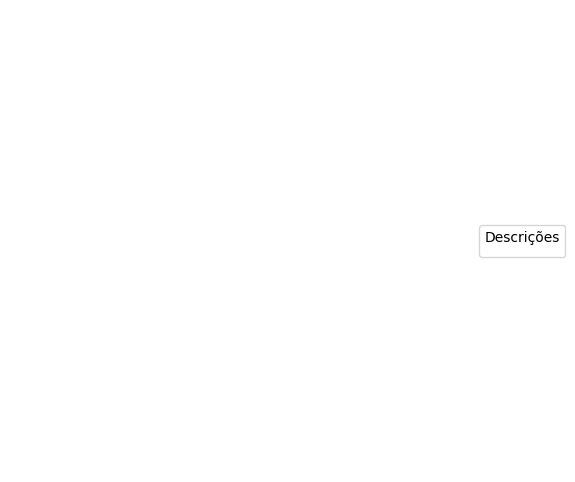

In [9]:
App()